In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Praca domowa 6

In [11]:
df = pd.read_csv("Animation_Movies.csv")

##  Zad 1

In [12]:
print("Rozmiar zbioru:", df.shape)

missing = df.isnull().sum()
print("Liczba braków danych:\n", missing[missing > 0])

print("Typy zmiennych:\n", df.dtypes)

Rozmiar zbioru: (51945, 23)
Liczba braków danych:
 title                       1
release_date             2137
backdrop_path           36110
homepage                43692
imdb_id                 22393
original_title              1
overview                 6079
poster_path             14011
tagline                 47267
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64
Typy zmiennych:
 id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path    


Zbiór danych zawiera 51 945 obserwacji i 23 zmienne opisujące filmy, takie jak tytuł, data premiery, budżet, przychód, język, kraj produkcji czy oceny widzów.   
Występują znaczne braki danych w wielu kolumnach, najbardziej niekompletne są kolumny ze zmiennymi opisowymi takie jak: tagline, homepage, backdrop_path i imdb_id, gdzie mamy ponad 20k braków.  
Mniejsze braki występują w release_date, overview czy poster_path, natomiast tylko pojedyncze braki pojawiają się w title i original_title.  
Kolumny liczbowe np. budget, revenue, vote_average czy runtime, są kompletne. 


## Zad 2

In [20]:
temp = df.drop(columns='id')
temp.describe()

,vote_average,vote_count,revenue,runtime,budget,popularity
count,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000
mean,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233
std,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000
75%,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000
max,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000


Większość filmów w zbiorze nie posiada ocen, głosów ani danych finansowych, wartości te wynoszą zero dla ponad połowy przypadków.   
Tylko nieliczne filmy są popularne, dobrze oceniane i mają wysokie budżety.  
Średni czas trwania to 21 minut, a mediana to zaledwie 7 minut, co sugeruje obecność wielu krótkich form.  
Najdłuższy runtime to aż 3720 minut, zapewne jest to serial lub film z wieloma częściami.

## Zad 3

In [23]:
grouped = df.groupby('status')[['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']]
summary = grouped.mean().sort_values(by='revenue', ascending=False)
print(" Średnie wartości według kraju produkcji:")
summary

 Średnie wartości według kraju produkcji:


,vote_average,vote_count,revenue,runtime,budget,popularity
status,,,,,,
Released,2.637570,41.035984,1.893019e+06,20.752982,5.739486e+05,1.892165
In Production,0.078740,0.007874,1.312336e-02,25.963255,5.331161e+05,1.635026
Canceled,0.000000,0.000000,0.000000e+00,16.411765,0.000000e+00,0.722176
Planned,0.000000,0.000000,0.000000e+00,39.580328,3.152855e+05,0.825039
Post Production,0.000000,0.000000,0.000000e+00,23.577320,2.785777e+06,3.426031
Rumored,0.545455,0.090909,0.000000e+00,1.000000,0.000000e+00,0.660273


Na podstawie średnich wartości według statusu filmu widać wyraźnie, że filmy o statusie "Released" mają zdecydowanie najwyższe średnie wartości ocen widzów, liczby głosów, przychodów i popularności, co jest oczywiste bo są one dostępne publicznie i miały szansę zebrać dane.   
Filmy w produkcji lub planowane mają znacznie niższe wskaźniki, często bliskie zeru, zwłaszcza dla ocen, głosów i przychodów,wynika to z faktu, że nie zostały jeszcze ukończone ani wypuszczone.    
Co ciekawe "Post Production" ma wysoką średnią wartość budżetu, co może sugerować duże produkcje oczekujące na premierę.   
Z kolei statusy „Canceled” i „Rumored” są praktycznie pozbawione danych liczbowych, co odzwierciedla ich niedokończony lub niepewny charakter.

## Zad 4

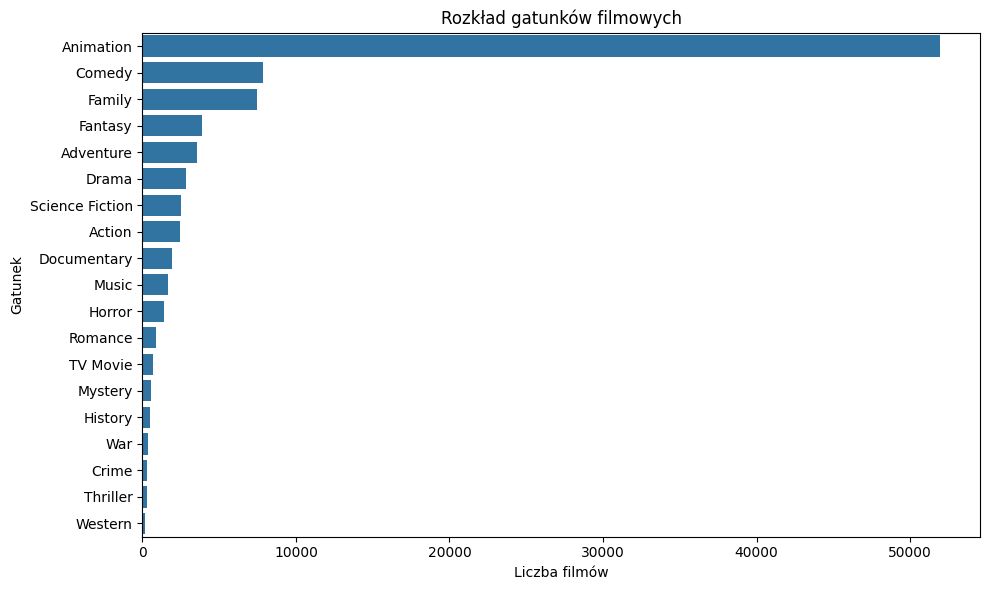

In [ ]:
df_temp = df.dropna(subset=['genres'])

genre_counts = df_temp['genres'].str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Rozkład gatunków filmowych')
plt.xlabel('Liczba filmów')
plt.ylabel('Gatunek')
plt.tight_layout()
plt.show()

Gatunek "Animation" zdecydowanie dominuje, liczba filmów animowanych przekracza 50 000, co stanowi ogromną przewagę nad pozostałymi kategoriami.  
"Comedy" i "Family" to kolejne popularne gatunki (ale widocznie mniej niż animation), z liczbą filmów na poziomie około 7 000–9 000.  
Rozkład jest bardzo niezrównoważony, kilka kategorii dominuje, a większość występuje stosunkowo rzadko.

## Zad 5

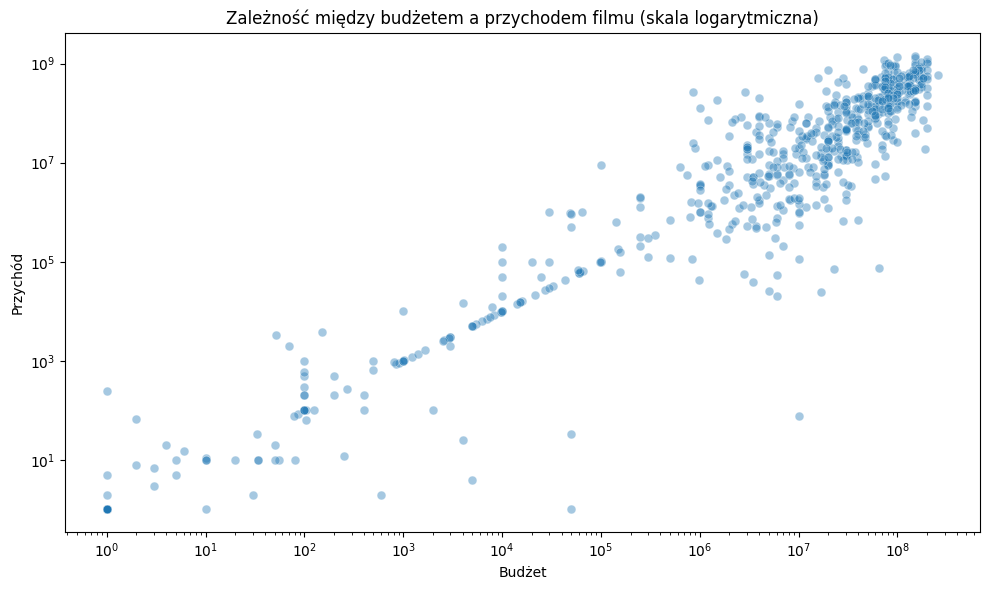

In [52]:
filtered = df[(df['budget'] > 0) & (df['revenue'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x='budget', y='revenue', s=40, alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.title('Zależność między budżetem a przychodem filmu (skala logarytmiczna)')
plt.xlabel('Budżet')
plt.ylabel('Przychód')
plt.tight_layout()
plt.show()

Większy budżet często wiąże się z większym przychodem, choć nie jest to reguła.  
Wystepuje duża zmienność przychodów niezależnie od budżetu, dla tego samego poziomu budżetu przychody mogą się znacznie różnić. Oznacza to, że wysoki budżet nie gwarantuje sukcesu finansowego.  
Występuje wiele filmów z niskim budżetem (poniżej 50 mln), większość punktów skupia się przy lewej stronie wykresu, co sugeruje, że wiele filmów ma stosunkowo niewielki budżet.  
Nieliczne filmy z ogromnymi przychodami,kilka punktów osiąga przychody rzędu 1 miliarda dolarów lub więcej.  

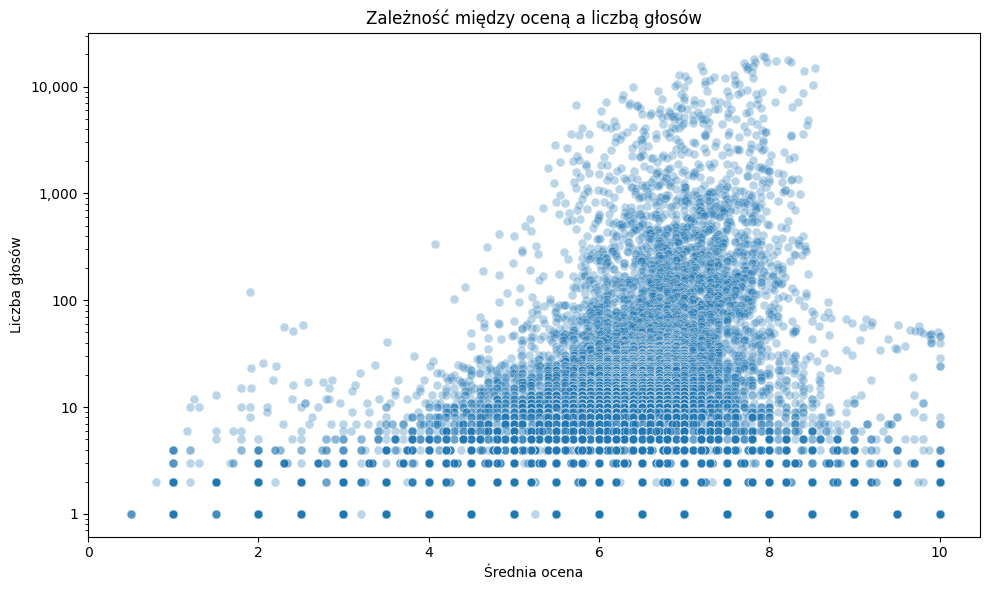

In [ ]:
filtered = df[(df['vote_average']>0) & (df['vote_count']>0)]
plt.figure(figsize=(10,6))
sns.scatterplot(data=filtered, x='vote_average', y='vote_count', s=40, alpha=0.3)
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
plt.xlim(left=0)
plt.title('Zależność między oceną a liczbą głosów')
plt.xlabel('Średnia ocena')
plt.ylabel('Liczba głosów')
plt.tight_layout()
plt.show()


Nie występuje jednoznaczna zależność liniowa między oceną a liczbą głosów. Filmy z wysoką liczbą głosów niekoniecznie mają najwyższe oceny.  
Zdecydowana większość filmów ma średnią ocenę w zakresie od 6 do 8.  
Znaczna liczba punktów znajduje się przy dolnej krawędzi wykresu, co oznacza, że wiele filmów zebrało bardzo mało głosów.  
Brak filmów o bardzo wysokich ocenach (>9) z dużą liczbą głosów.